# Solution 1: Download from portal

In [2]:
import os
import pandas as pd
print("PUIdata", os.getenv("PUIDATA"))
%pylab inline

PUIdata /nfshome/mh5172/PUIdata
Populating the interactive namespace from numpy and matplotlib


In [3]:
!ls $PUIDATA

E-Designations__CSV_file.csv
FY03___FY12_MMR_Agency_Performance_Indicators.csv
FY15_MMR_Agency_Performance_Indicators.csv
FY16_MMR_Spending_and_Budget_Information_by_Units_of_Appropriation.csv
FY17_MMR_Spending_and_Budget_Information_by_Units_of_Appropriation.csv
NYC_20Clean_20Air_20Survey_20Content.zip
sqf-2017.csv
summer2009_CD.csv


In [4]:
sbi = pd.read_csv("%s/FY17_MMR_Spending_and_Budget_Information_by_Units_of_Appropriation.csv"%os.getenv("PUIDATA"))
sbi.head(8)

,Agency Code,Agency,Agency Name,UA,UA_Name,PS_OTPS_Ind,"FY 16 Expenditures ($000,000)","FY 17 Modified ($000,000)",Applicable MMR Goals,Notes
0,NaN,311,311,NaN,NaN,NaN,NaN,NaN,NaN,311 is contained within the Department of Info...
1,NaN,NYCHA,NEW YORK CITY HOUSING AUTHORITY,NaN,NaN,NaN,NaN,NaN,NaN,The City's contributions to the New York City ...
2,NaN,SCA,DEPARTMENT OF EDUCATION - SCHOOL CONSTRUCTION ...,NaN,NaN,NaN,NaN,NaN,NaN,The City's contributions to the School Contruc...
3,3.0,BOE,BOARD OF ELECTIONS,1.0,PERSONAL SERVICES,Personal Services,54.0,61.7,NaN,These figures are limited to the City’s contri...
4,3.0,BOE,BOARD OF ELECTIONS,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,62.6,70.4,NaN,These figures are limited to the City’s contri...
5,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,1.0,PERSONAL SERVICES,Personal Services,13.9,21.1,All,NaN
6,17.0,NYCEM,DEPARTMENT OF EMERGENCY MANAGEMENT,2.0,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,21.8,38.3,All,NaN
7,25.0,LAW,LAW DEPARTMENT,1.0,PERSONAL SERVICES,Personal Services,118.8,129.9,All,NaN


## Table 1
NYC agency spending and budget information by units of appropriation data from the Mayor's Management Report (MMR). 
For information related to the ‘Applicable MMR Goals’ column, refer to FY17 MMR Goals And Services  I only showed the first 7 rows.

In [5]:
sbi_2c = sbi[['FY 16 Expenditures ($000,000)', 'FY 17 Modified ($000,000)']]
sbi_2c.head(8)

,"FY 16 Expenditures ($000,000)","FY 17 Modified ($000,000)"
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,54.0,61.7
4,62.6,70.4
5,13.9,21.1
6,21.8,38.3
7,118.8,129.9


Text(0.5,1,'Expenditures in 16&17')

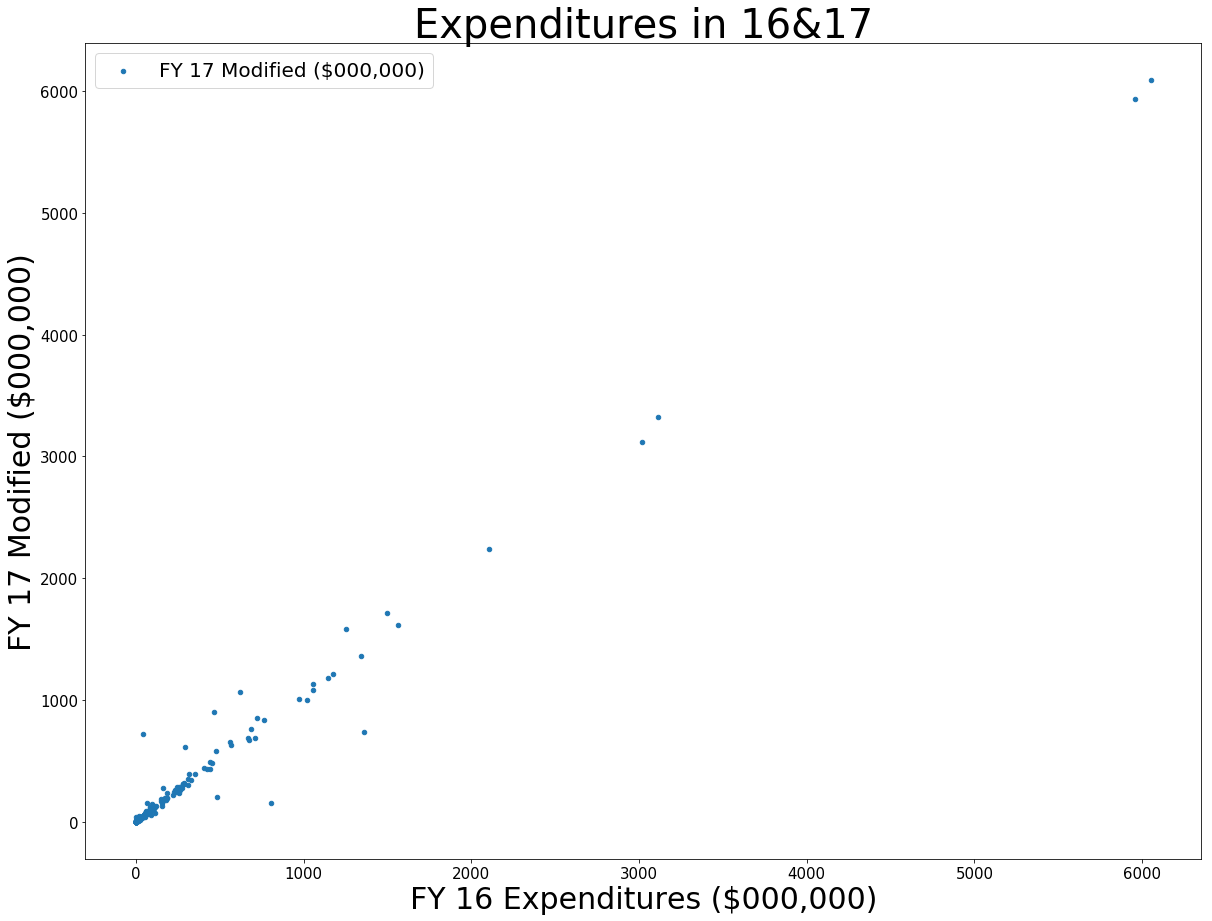

In [6]:
fig = sbi_2c.plot(x="FY 16 Expenditures ($000,000)", y='FY 17 Modified ($000,000)',kind="scatter",fontsize=15,figsize=(20,15))
fig.legend(['FY 17 Modified ($000,000)'],fontsize=20)
fig.set_xlabel('FY 16 Expenditures ($000,000)',fontsize=30)
fig.set_ylabel('FY 17 Modified ($000,000)',fontsize=30)
fig.set_title("Expenditures in 16&17",fontsize=40)

## Figure 1
This figure shows the FY 16 Expenditures and FY 17 Modified Expenditures. The X is FY 16 Expenditures and the Y is FY 17 Modified Expenditures

# Extra: Use API and download a json file

In [7]:
url = 'https://data.cityofnewyork.us/resource/waf7-5gvc.json'
wch = pd.read_json(url)
wch.head(8)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986


In [8]:
wch_2c = wch[['year','per_capita_gallons_per_person_per_day']]

<bound method NDFrame.head of     year  per_capita_gallons_per_person_per_day
0   1979                                    213
1   1980                                    213
2   1981                                    185
3   1982                                    194
4   1983                                    198
5   1984                                    203
6   1985                                    182
7   1986                                    185
8   1987                                    197
9   1988                                    202
10  1989                                    191
11  1990                                    194
12  1991                                    199
13  1992                                    184
14  2006                                    132
15  2008                                    135
16  2010                                    127
17  2016                                    117
18  2011                                    123
19  1997  

In [22]:
wch_2c.rename(columns = {'year':"Year",'per_capita_gallons_per_person_per_day':'Gallons/Person/Day'}, inplace=True)
wch_2c.sort_values(by = ['Year'], inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


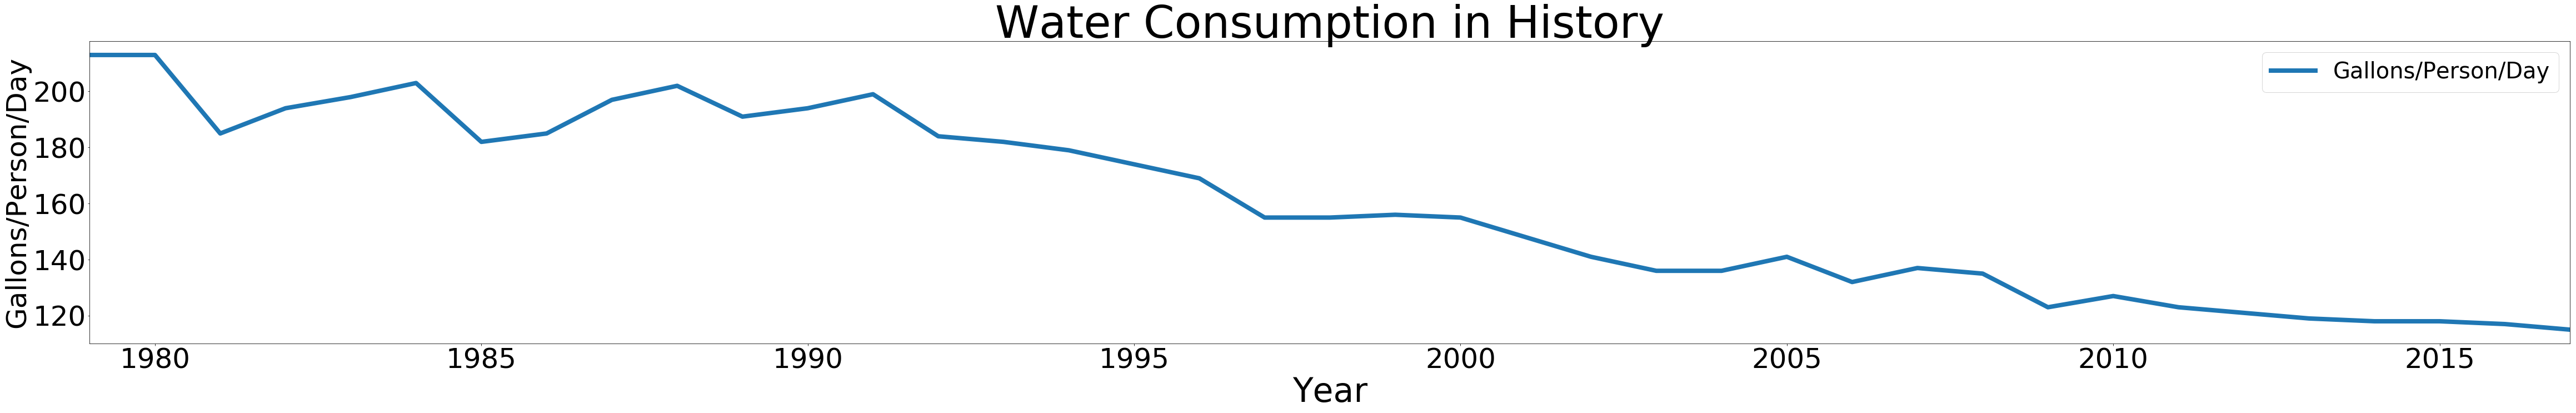

In [23]:
fig = wch_2c.plot(x="Year", y='Gallons/Person/Day',kind="line",fontsize=50,figsize=(80,10),linewidth=8.0)
fig.legend(['Gallons/Person/Day'],fontsize=40)
fig.set_xlabel('Year',fontsize=60)
fig.set_ylabel('Gallons/Person/Day',fontsize=50)
fig.set_title("Water Consumption in History",fontsize=80)
fig.xlim = ([0, 2018])

## Figure 2
This figure shows the water consumption of per captia gallon per person per day varies with year, from 1980 to 2017.